information
553 ingredients

In [1]:
path = '/home/julius/Hack/nutrition5k_dataset_nosides/metadata'

In [3]:
from transformers import AutoFeatureExtractor, SwinForImageClassification
from PIL import Image
import requests


In [4]:

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)


In [11]:
i = image.resize((224, 224))

In [19]:

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-base-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-base-patch4-window7-224")


/home/julius/anaconda3/envs/venv/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [20]:
model

SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfO

In [21]:
import torch
from torchvision.models import resnet50
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

# Load the pretrained model
model = resnet50(pretrained=True)
model.eval()

# Prepare an image transform pipeline
transform = Compose([
    Resize((224, 224)),  # Resize images to match model input size
    ToTensor(),  # Convert images to PyTorch tensors
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize images
])

/home/julius/anaconda3/envs/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/julius/anaconda3/envs/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/julius/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:28<00:00, 3.58MB/s]


In [22]:
path_im = '~/Hack/nutrition5k_dataset_nosides/metadata/cafe1_own.csv'


In [25]:
import pandas as pd

In [33]:
df = pd.read_csv(path_im)
df.columns = ['id', 'calories', 'mass', 'fat', 'carb', 'protein']

In [34]:
df

,id,calories,mass,fat,carb,protein
0,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000
1,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593
2,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387
3,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000
4,dish_1558372433,74.360001,143.0,0.286000,0.429000,20.020000
...,...,...,...,...,...,...
4762,dish_1551139192,31.500000,63.0,0.063000,8.190000,0.315000
4763,dish_1563382911,182.040009,123.0,13.530000,1.968000,12.300000
4764,dish_1562691737,485.676880,700.0,11.722251,70.597321,27.926394
4765,dish_1558458496,53.130001,77.0,0.154000,13.860001,0.539000


In [54]:
import numpy as np
def prepare_image(image_path, target_size=(128, 128)):
    """
    Load an image file and prepare it for model prediction.
    """
    # Load the image
    image = Image.open(image_path)
    
    # Resize the image
    image = image.resize(target_size)
    
    # Convert the image to a numpy array and normalize it
    image = np.array(image) / 255.0
    
    # Ensure it's in the right shape (batch size, height, width, channels)
    #image = np.expand_dims(image, axis=0)
    
    return image

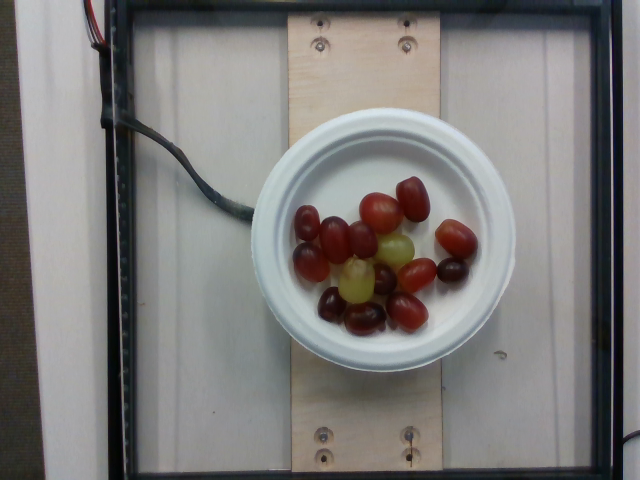

In [52]:
p = '/home/julius/Hack/nutrition5k_dataset_nosides/imagery/realsense_overhead/dish_1558458496/rgb.png'
image = Image.open(p)


In [47]:
df['image'] = None
df

,id,calories,mass,fat,carb,protein,image
0,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000,None
1,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593,None
2,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387,None
3,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000,None
4,dish_1558372433,74.360001,143.0,0.286000,0.429000,20.020000,None
...,...,...,...,...,...,...,...
4762,dish_1551139192,31.500000,63.0,0.063000,8.190000,0.315000,None
4763,dish_1563382911,182.040009,123.0,13.530000,1.968000,12.300000,None
4764,dish_1562691737,485.676880,700.0,11.722251,70.597321,27.926394,None
4765,dish_1558458496,53.130001,77.0,0.154000,13.860001,0.539000,None


In [58]:
from tqdm import tqdm
import os
basepath = '/home/julius/Hack/nutrition5k_dataset_nosides/imagery/realsense_overhead/'
images = []
for line, id in tqdm(enumerate(df['id'].values)):
    p = basepath + id + '/rgb.png'
    if os.path.exists(p):
        d = {}
        df.loc[line, 'image'] = [prepare_image(p)]
        #d['depth'] = Image.open(basepath + id + '/depth_color.png')

4767it [00:31, 149.78it/s]


In [61]:
df = df.dropna()


In [62]:
df.shape

(3261, 7)

In [63]:
df.to_pickle('df.pkl')
